# Demo 06

In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Word Frequencies

### Words in the wild

In [100]:
word_counts_df = pd.read_csv("data/norvig_count1w.txt", sep="\t", header=None)
word_counts_df = word_counts_df.rename(columns={0: "type", 1: "count"})
word_counts_df

,type,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
...,...,...
333328,gooek,12711
333329,gooddg,12711
333330,gooblle,12711
333331,gollgo,12711


([<matplotlib.axis.XTick at 0x7f93591df2b0>,
 [Text(0, 0, 'the'),
  Text(1, 0, 'of'),
  Text(2, 0, 'and'),
  Text(3, 0, 'to'),
  Text(4, 0, 'a'),
  Text(5, 0, 'in'),
  Text(6, 0, 'for'),
  Text(7, 0, 'is'),
  Text(8, 0, 'on'),
  Text(9, 0, 'that'),
  Text(10, 0, 'by'),
  Text(11, 0, 'this'),
  Text(12, 0, 'with'),
  Text(13, 0, 'i'),
  Text(14, 0, 'you'),
  Text(15, 0, 'it'),
  Text(16, 0, 'not'),
  Text(17, 0, 'or'),
  Text(18, 0, 'be'),
  Text(19, 0, 'are')])

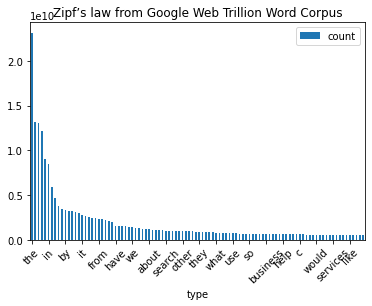

In [101]:
ax = word_counts_df.head(100).plot(kind="bar", x='type', rot=45)
ax.set_title("Zipf’s law from Google Web Trillion Word Corpus")

plt.xticks(np.arange(0, 100, step=5))

**Question:** What do we notice about these words?

([<matplotlib.axis.XTick at 0x7f93587d6550>,
 [Text(0, 0, 'the'),
  Text(1, 0, 'of'),
  Text(2, 0, 'and'),
  Text(3, 0, 'to'),
  Text(4, 0, 'a'),
  Text(5, 0, 'in'),
  Text(6, 0, 'for'),
  Text(7, 0, 'is'),
  Text(8, 0, 'on'),
  Text(9, 0, 'that'),
  Text(10, 0, 'by'),
  Text(11, 0, 'this'),
  Text(12, 0, 'with'),
  Text(13, 0, 'i'),
  Text(14, 0, 'you'),
  Text(15, 0, 'it'),
  Text(16, 0, 'not'),
  Text(17, 0, 'or'),
  Text(18, 0, 'be'),
  Text(19, 0, 'are'),
  Text(20, 0, 'from'),
  Text(21, 0, 'at'),
  Text(22, 0, 'as'),
  Text(23, 0, 'your'),
  Text(24, 0, 'all')])

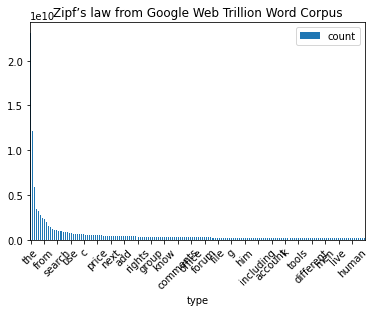

In [102]:
ax = word_counts_df.head(500).plot(kind="bar", x='type', rot=45)
ax.set_title("Zipf’s law from Google Web Trillion Word Corpus")

plt.xticks(np.arange(0, 500, step=20))

(back to slides)

## Bag of Words

Let's get the BoW for this sentence

In [125]:
nltk.FreqDist(nltk.word_tokenize("Penny bought bright blue fishes on a bright blue sunny day"))

FreqDist({'bright': 2, 'blue': 2, 'Penny': 1, 'bought': 1, 'fishes': 1, 'on': 1, 'a': 1, 'sunny': 1, 'day': 1})

Let's now get BoWs for each of these sentences

In [124]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the bug, it is still meowing at the bug and the fish",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

In [126]:
[nltk.FreqDist(nltk.word_tokenize(sent)) for sent in texts]

[FreqDist({'Penny': 1, 'bought': 1, 'bright': 1, 'blue': 1, 'fishes': 1, '.': 1}),
 FreqDist({'Penny': 1, 'bought': 1, 'bright': 1, 'blue': 1, 'and': 1, 'orange': 1, 'fish': 1, '.': 1}),
 FreqDist({'The': 1, 'cat': 1, 'ate': 1, 'a': 1, 'fish': 1, 'at': 1, 'the': 1, 'store': 1, '.': 1}),
 FreqDist({'Penny': 3, '.': 3, 'a': 2, 'went': 1, 'to': 1, 'the': 1, 'store': 1, 'ate': 1, 'bug': 1, 'saw': 1, ...}),
 FreqDist({'the': 3, 'at': 2, 'bug': 2, 'It': 1, 'meowed': 1, 'once': 1, ',': 1, 'it': 1, 'is': 1, 'still': 1, ...}),
 FreqDist({'The': 3, 'cat': 3, 'is': 3, '.': 3, 'at': 2, 'the': 2, 'fish': 2, 'store': 1, 'orange': 1, 'meowing': 1}),
 FreqDist({'Penny': 1, 'is': 1, 'a': 1, 'fish': 1})]

What if we want to compare them?

(back to slides)

## Document Vector

In [127]:
doc_vector = pd.Series(nltk.word_tokenize("Penny bought bright blue fishes on a bright blue sunny day."))
doc_vector.value_counts()

blue      2
bright    2
on        1
bought    1
Penny     1
.         1
a         1
day       1
sunny     1
fishes    1
dtype: int64

In [134]:
[pd.Series(nltk.word_tokenize(sent)).value_counts() for sent in texts]

[blue      1
 .         1
 bought    1
 Penny     1
 fishes    1
 bright    1
 dtype: int64,
 blue      1
 .         1
 bought    1
 Penny     1
 fish      1
 and       1
 orange    1
 bright    1
 dtype: int64,
 .        1
 cat      1
 a        1
 store    1
 the      1
 fish     1
 The      1
 ate      1
 at       1
 dtype: int64,
 .        3
 Penny    3
 a        2
 fish     1
 the      1
 went     1
 ate      1
 bug      1
 saw      1
 to       1
 store    1
 dtype: int64,
 the        3
 at         2
 bug        2
 is         1
 meowed     1
 It         1
 and        1
 meowing    1
 still      1
 ,          1
 fish       1
 once       1
 it         1
 dtype: int64,
 is         3
 .          3
 cat        3
 The        3
 at         2
 fish       2
 the        2
 meowing    1
 store      1
 orange     1
 dtype: int64,
 is       1
 fish     1
 a        1
 Penny    1
 dtype: int64]

## Document-Term Matrix

In [135]:
pd.DataFrame([pd.Series(nltk.word_tokenize(sent)).value_counts() for sent in texts]).T

,0,1,2,3,4,5,6
blue,1.0,1.0,NaN,NaN,NaN,NaN,NaN
.,1.0,1.0,1.0,3.0,NaN,3.0,NaN
bought,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Penny,1.0,1.0,NaN,3.0,NaN,NaN,1.0
fishes,1.0,NaN,NaN,NaN,NaN,NaN,NaN
bright,1.0,1.0,NaN,NaN,NaN,NaN,NaN
fish,NaN,1.0,1.0,1.0,1.0,2.0,1.0
and,NaN,1.0,NaN,NaN,1.0,NaN,NaN
orange,NaN,1.0,NaN,NaN,NaN,1.0,NaN
cat,NaN,NaN,1.0,NaN,NaN,3.0,NaN


In [137]:
pd.DataFrame([pd.Series(nltk.word_tokenize(sent)).value_counts() for sent in texts]).fillna(0)

,blue,.,bought,Penny,fishes,bright,fish,and,orange,cat,...,saw,to,is,meowed,It,meowing,still,",",once,it
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(back to slides)

Sometimes we will transpose this matrix

In [138]:
pd.DataFrame([pd.Series(nltk.word_tokenize(sent)).value_counts() for sent in texts]).fillna(0).T

,0,1,2,3,4,5,6
blue,1.0,1.0,0.0,0.0,0.0,0.0,0.0
.,1.0,1.0,1.0,3.0,0.0,3.0,0.0
bought,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Penny,1.0,1.0,0.0,3.0,0.0,0.0,1.0
fishes,1.0,0.0,0.0,0.0,0.0,0.0,0.0
bright,1.0,1.0,0.0,0.0,0.0,0.0,0.0
fish,0.0,1.0,1.0,1.0,1.0,2.0,1.0
and,0.0,1.0,0.0,0.0,1.0,0.0,0.0
orange,0.0,1.0,0.0,0.0,0.0,1.0,0.0
cat,0.0,0.0,1.0,0.0,0.0,3.0,0.0




### Sklearn

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [139]:
matrix = count_vectorizer.fit_transform(texts)
matrix

<7x23 sparse matrix of type '<class 'numpy.int64'>'
	with 49 stored elements in Compressed Sparse Row format>

In [140]:
matrix.toarray()

array([[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
        0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1,
        1],
       [1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0,
        0],
       [0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 5, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0]])

In [141]:
pd.DataFrame(matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,0,3,1,0,1,1,1,1
4,1,2,0,0,0,0,2,0,1,0,...,1,1,0,0,0,1,0,3,0,0
5,0,2,0,0,0,0,0,3,2,0,...,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [142]:
count_vectorizer.get_feature_names()

['and',
 'at',
 'ate',
 'blue',
 'bought',
 'bright',
 'bug',
 'cat',
 'fish',
 'fishes',
 'is',
 'it',
 'meowed',
 'meowing',
 'once',
 'orange',
 'penny',
 'saw',
 'still',
 'store',
 'the',
 'to',
 'went']

In [144]:
pd.DataFrame(matrix.toarray(), columns= count_vectorizer.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,...,meowing,once,orange,penny,saw,still,store,the,to,went
0,0,0,0,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,0,3,1,0,1,1,1,1
4,1,2,0,0,0,0,2,0,1,0,...,1,1,0,0,0,1,0,3,0,0
5,0,2,0,0,0,0,0,3,2,0,...,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


I sometimes like to transpose this matrix

In [145]:
pd.DataFrame(matrix.toarray().T, index= count_vectorizer.get_feature_names())

,0,1,2,3,4,5,6
and,0,1,0,0,1,0,0
at,0,0,1,0,2,2,0
ate,0,0,1,1,0,0,0
blue,1,1,0,0,0,0,0
bought,1,1,0,0,0,0,0
bright,1,1,0,0,0,0,0
bug,0,0,0,1,2,0,0
cat,0,0,1,0,0,3,0
fish,0,1,1,1,1,2,1
fishes,1,0,0,0,0,0,0


Let's put this into a function

In [147]:
def make_matrix(corpus):
    count_vectorizer = CountVectorizer()
    matrix = count_vectorizer.fit_transform(corpus)
    return pd.DataFrame(matrix.toarray().T, index= count_vectorizer.get_feature_names())

make_matrix(texts)

,0,1,2,3,4,5,6
and,0,1,0,0,1,0,0
at,0,0,1,0,2,2,0
ate,0,0,1,1,0,0,0
blue,1,1,0,0,0,0,0
bought,1,1,0,0,0,0,0
bright,1,1,0,0,0,0,0
bug,0,0,0,1,2,0,0
cat,0,0,1,0,0,3,0
fish,0,1,1,1,1,2,1
fishes,1,0,0,0,0,0,0


### Product Reviews

In [148]:
from nltk.corpus import product_reviews_1

In [149]:
product_reviews_1.fileids()

['Apex_AD2600_Progressive_scan_DVD player.txt',
 'Canon_G3.txt',
 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt',
 'Nikon_coolpix_4300.txt',
 'Nokia_6610.txt',
 'README.txt']

In [150]:
canon_g3_reviews = [review.sents() for review in product_reviews_1.reviews('Canon_G3.txt')]
canon_g3_reviews[0][0:2]

[['i',
  'recently',
  'purchased',
  'the',
  'canon',
  'powershot',
  'g3',
  'and',
  'am',
  'extremely',
  'satisfied',
  'with',
  'the',
  'purchase',
  '.'],
 ['the',
  'camera',
  'is',
  'very',
  'easy',
  'to',
  'use',
  ',',
  'in',
  'fact',
  'on',
  'a',
  'recent',
  'trip',
  'this',
  'past',
  'week',
  'i',
  'was',
  'asked',
  'to',
  'take',
  'a',
  'picture',
  'of',
  'a',
  'vacationing',
  'elderly',
  'group',
  '.']]

In [151]:
make_matrix(canon_g3_reviews).shape

AttributeError: 'list' object has no attribute 'lower'

So we need to extract the text from the list of reviews

In [152]:
review_corpus = [" ".join([" ".join(sent) for sent in review]) for review in canon_g3_reviews]
f"There are {len(review_corpus)} amount of reviews."

'There are 45 amount of reviews'

#### Exploring corpus

Let's get a sense of these reviews. It is usually a good idea to get a sense of the corpus

**Question:** How big is the vocabulary of these reviews?

In [161]:
nltk.FreqDist(" ".join(review_corpus).split())

FreqDist({'the': 666, '.': 555, ',': 434, 'and': 319, 'i': 308, 'a': 262, 'to': 248, 'is': 199, 'camera': 181, 'of': 176, ...})

In [162]:
len(nltk.FreqDist(" ".join(review_corpus).split()))

1881

**Question:** How many tokens are in the corpus?

In [168]:
sum(nltk.FreqDist(" ".join(review_corpus).split()).values())

11973

**Question:** What is the distribution of word types in the reviews?

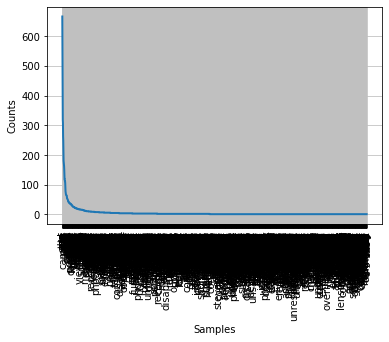

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [164]:
nltk.FreqDist(" ".join(review_corpus).split()).plot()

**Question:** How long are these reviews?

In [158]:
pd.DataFrame(review_corpus).rename(columns={0:"text"})['text'].map(lambda x: len(x.split())).describe()

count      45.000000
mean      266.066667
std       233.758461
min        14.000000
25%       116.000000
50%       217.000000
75%       292.000000
max      1146.000000
Name: text, dtype: float64

#### Document Matrix of reviews

In [59]:
make_matrix(review_corpus)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoom,0,0,0,0,0,1,4,1,0,1,...,1,0,2,1,0,0,2,0,0,0
zooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Question:** What does each row represent?

**Question:** What do we notice about these rows?

**Question:** What do we think about the last few rows?

#### Pre-processing document matrix

##### Remove stop words

In [169]:
cleaned_corpus = []
for review in review_corpus:
    clean_review = []
    review_tokens = nltk.word_tokenize(review)
    for word in review_tokens:
        if word not in nltk.corpus.stopwords.words('english'):
            clean_review.append(word)
    cleaned_corpus.append(" ".join(clean_review))
make_matrix(cleaned_corpus)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoom,0,0,0,0,0,1,4,1,0,1,...,1,0,2,1,0,0,2,0,0,0
zooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Stem tokens


In [170]:
stemmer = nltk.stem.SnowballStemmer(language='english')
stemmer.stem('zooming')

'zoom'

In [171]:
cleaned_corpus = []
for review in review_corpus:
    clean_review = []
    review_tokens = nltk.word_tokenize(review)
    for word in review_tokens:
        if word not in nltk.corpus.stopwords.words('english'):
            clean_review.append(stemmer.stem(word))
    cleaned_corpus.append(" ".join(clean_review))
make_matrix(cleaned_corpus)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
your,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Remove punctuation and numbers

In [172]:

cleaned_corpus = []
for review in review_corpus:
    clean_review = []
    review_tokens = nltk.word_tokenize(review)
    for word in review_tokens:
        if word not in nltk.corpus.stopwords.words('english') and word.isalpha():
            clean_review.append(stemmer.stem(word))
    cleaned_corpus.append(" ".join(clean_review))
    
curr_matrix_df = make_matrix(cleaned_corpus)
curr_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
abil,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolut,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
access,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
your,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Question:** What do we think the most common value is?

Consequently, these vectors can be called **sparse vectors**

Let's look at the first document

**Question:** How can we get the first document from the matrix?

In [173]:
first_doc = curr_matrix_df[0]
first_doc[first_doc != 0]

abil      1
adjust    1
advanc    1
anyon     1
ask       1
         ..
way       1
week      1
well      1
work      1
yet       1
Name: 0, Length: 87, dtype: int64

It looks like a lot of words appear just once

Text(0.5, 1.0, 'Number of times each word appears in first Review')

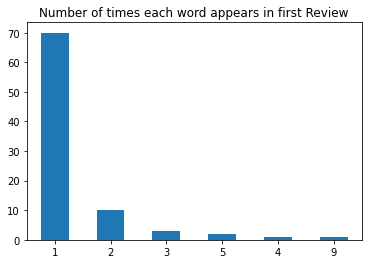

In [174]:
ax = first_doc[first_doc != 0].value_counts().plot(kind='bar', rot=0)
ax.set_title("Number of times each word appears in first Review")

So let's look at just words that appear more than once

In [175]:
first_doc[first_doc > 1]

camera       5
canon        3
easi         2
flash        4
flexibl      2
get          2
high         2
larger       3
pictur       9
press        2
purchas      2
qualiti      3
recent       2
recommend    2
take         2
turn         2
use          5
Name: 0, dtype: int64

**VALIDATE VALIDATE VALIDATE**

**Question:** How well does this vector capture the review?

(Run the next cell to see the original review and them compare)

In [176]:
review_corpus[0]

"i recently purchased the canon powershot g3 and am extremely satisfied with the purchase . the camera is very easy to use , in fact on a recent trip this past week i was asked to take a picture of a vacationing elderly group . after i took their picture with their camera , they offered to take a picture of us . i just told them , press halfway , wait for the box to turn green and press the rest of the way . they fired away and the picture turned out quite nicely . ( as all of my pictures have thusfar ) . a few of my work constituants owned the g2 and highly recommended the canon for picture quality . i ' m easily enlarging pictures to 8 1 / 2 x 11 with no visable loss in picture quality and not even using the best possible setting as yet ( super fine ) . ensure you get a larger flash , 128 or 256 , some are selling with the larger flash , 32mb will do in a pinch but you ' ll quickly want a larger flash card as with any of the 4mp cameras . bottom line , well made camera , easy to use 

#### Most common word in each review

In [177]:
curr_matrix_df.apply(lambda x: (x.idxmax(), x.max()), axis=0).rename({0:"word", 1:"count"})

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
word,pictur,around,camera,canon,adjust,focus,pictur,find,camera,camera,...,camera,work,len,len,ship,camera,camera,featur,camera,camera
count,9,3,7,3,4,4,6,3,4,5,...,10,2,8,4,6,5,18,5,6,2


We might think that document 0 focuses more on "pictures" than document 6

**Question:** Is `pictur` actually much more prominent in review 0 than review 6? 

In [178]:
review_length_df = pd.DataFrame([(idx, len(review.split())) for idx, review in enumerate(cleaned_corpus)])
review_length_df = review_length_df.rename(columns={0: 'review_id', 1: 'review_length'})
review_length_df.head()

,review_id,review_length
0,0,123
1,1,119
2,2,98
3,3,62
4,4,69


In [179]:
review_length_df[(review_length_df['review_id'] == 0)
                |
                (review_length_df['review_id'] == 6)]

,review_id,review_length
0,0,123
6,6,87


### Convert counts to frequencies

In [185]:
curr_matrix_df[0] / sum(curr_matrix_df[0])

abil       0.008197
abl        0.000000
absolut    0.000000
accept     0.000000
access     0.000000
             ...   
youd       0.000000
your       0.000000
youv       0.000000
zeiss      0.000000
zoom       0.000000
Name: 0, Length: 1303, dtype: float64

In [186]:
freq_df = curr_matrix_df.apply(lambda x: x/x.sum(), axis=0)
freq_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
abil,0.008197,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
abl,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
absolut,0.000000,0.0,0.010526,0.0,0.0,0.000000,0.000000,0.000000,0.010753,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
accept,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.010101,0.0,0.000000,0.0,0.011236,0.0
access,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.003891,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youd,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
your,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
youv,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
zeiss,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


The sum of each column should be one

In [208]:
freq_df.apply(lambda x: sum(x), axis=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
dtype: float64

**Question:** What is the most frequent word in each review?

In [214]:
freq_df.apply(lambda x: (x.idxmax(), x.max()), axis=0).rename({0:"word", 1:"freq"})

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
word,pictur,around,camera,canon,adjust,focus,pictur,find,camera,camera,...,camera,work,len,len,ship,camera,camera,featur,camera,camera
freq,0.07377,0.025424,0.071429,0.048387,0.057971,0.034188,0.068966,0.041667,0.042553,0.053763,...,0.03861,0.083333,0.035242,0.076923,0.056604,0.078125,0.042155,0.070423,0.067416,0.105263


**Question:** Do we now think document 0 and document 6 equally discuss "pictures"?

**Question:** Are these words actually interesting or unique to specific documents?

(back to slides)

## Inverse Document Frequency

Let's compute it manually

idf of word w in Document D is log(Number of documents divided by number of documents that contain w)

## TF-IDF

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
matrix = count_vectorizer.fit_transform(cleaned_corpus)
pd.DataFrame(matrix.toarray().T, index= count_vectorizer.get_feature_names())

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
abil,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolut,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
access,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
your,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's apply this to all the product reviews

In [190]:
product_reviews_1.fileids()

['Apex_AD2600_Progressive_scan_DVD player.txt',
 'Canon_G3.txt',
 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt',
 'Nikon_coolpix_4300.txt',
 'Nokia_6610.txt',
 'README.txt']

In [192]:
product_reviews_1.reviews('Nokia_6610.txt')

[Review(title="excellent phone , excellent service .", review_lines=[ReviewLine(features=[], notes=[], sent=['i', 'am', 'a', 'business', 'user', 'who', 'heavily', 'depend', 'on', 'mobile', 'service', '.']), ReviewLine(features=[('phone', '+3'), ('work', '+2')], notes=[], sent=['there', 'is', 'much', 'which', 'has', 'been', 'said', 'in', 'other', 'reviews', 'about', 'the', 'features', 'of', 'this', 'phone', ',', 'it', 'is', 'a', 'great', 'phone', ',', 'mine', 'worked', 'without', 'any', 'problems', 'right', 'out', 'of', 'the', 'box', '.']), ReviewLine(features=[], notes=[], sent=['just', 'double', 'check', 'with', 'customer', 'service', 'to', 'ensure', 'the', 'number', 'provided', 'by', 'amazon', 'is', 'for', 'the', 'city', '/', 'exchange', 'you', 'wanted', '.']), ReviewLine(features=[('t customer service', '-2')], notes=[], sent=['after', 'several', 'years', 'of', 'torture', 'in', 'the', 'hands', 'of', 'at', '&', 't', 'customer', 'service', 'i', 'am', 'delighted', 'to', 'drop', 'them',